In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rosbag
import rospy
%matplotlib notebook

In [12]:
f_name = 'cs137_246_sn160_newSettings.bag'
f_name = 'three_246_NaI_5min.bag'
f_name = 'moving.bag'
bag = rosbag.Bag(f_name)

In [13]:
# bag.read_messages?

In [14]:
# sns = ['eRC4129', 'eRC4130', 'eRC4131']

e29 = []
e30 = []
e31 = []
event29 = []
event30 = []
event31 = []
ts29 = []
ts30 = []
ts31 = []

sns = []
for topic, msg, ts in bag.read_messages(topics='/detector_data'):
    if msg.det_sn.data not in sns:
        sns.append(msg.det_sn.data)

for topic, msg, ts in bag.read_messages(topics='/detector_data'):
    if msg.det_sn.data == sns[0]:
        for i in msg.channel:
            e29.append(i)
        event29.append(len(msg.channel))
        ts29.append(msg.ts_sys)
    if len(sns)>1:
        if msg.det_sn.data == sns[1]:
            for i in msg.channel:
                e30.append(i)
            event30.append(len(msg.channel))
            ts30.append(msg.ts_sys)
        if msg.det_sn.data == sns[2]:
            for i in msg.channel:
                e31.append(i)
            event31.append(len(msg.channel))
            ts31.append(msg.ts_sys)
all_ch = [e29, e30, e31]
all_event = [event29, event30, event31]
all_ts = [ts29, ts30, ts31]

In [15]:
# sns = ['eRC4129', 'eRC4130', 'eRC4131']


In [16]:
sns

['eRC4131', 'eRC4130', 'eRC4129']

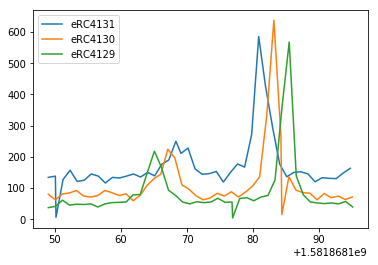

In [17]:
for c in range(len(sns)):
    plt.plot(all_ts[c], all_event[c], label=sns[c])
plt.legend()
plt.show()

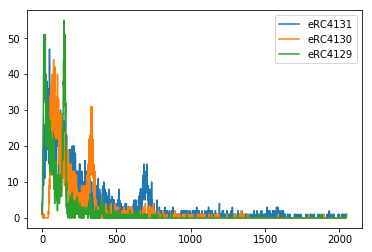

In [18]:
for c in range(len(all_ch)):
    hist, bins = np.histogram(all_ch[c], bins=2048)
    plt.plot(hist, label=sns[c])
plt.legend()
plt.show()

In [10]:
sns

['eRC4131', 'eRC4130', 'eRC4129']

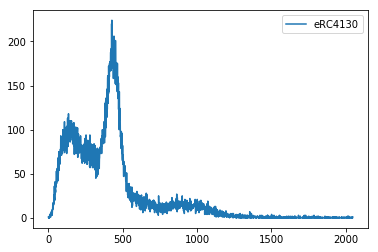

In [11]:
c=1
hist, bins = np.histogram(all_ch[c], bins=2048)
plt.plot(hist, label=sns[c])
plt.legend()
plt.show()